<a href="https://colab.research.google.com/github/Souzadfs/Data_Science/blob/main/Analista_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
import datetime as dt

In [6]:
df = pd.read_csv('global_tech_salary.txt')


**Visualização da base importada**

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [7]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4995,2023,SE,FT,Machine Learning Infrastructure Engineer,70000,EUR,75577,FR,100,FR,M
4996,2022,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
4997,2024,SE,FT,Machine Learning Engineer,153000,USD,153000,US,0,US,M
4998,2022,EN,FT,AI Scientist,30000,EUR,31520,PT,100,ES,M
4999,2023,SE,FT,Machine Learning Engineer,176000,USD,176000,US,0,US,M


In [9]:
df.shape

(5000, 11)

**Periodo da análise**

In [19]:
inicio = pd.to_datetime(df['work_year']).dt.date.min()
print(inicio)

1970-01-01


In [20]:
fim = pd.to_datetime(df['work_year']).dt.date.max()
print(fim)

1970-01-01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [22]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [23]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [24]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


from matplotlib import pyplot as plt
_df_0['work_year'].plot(kind='hist', bins=20, title='work_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['remote_ratio'].plot(kind='hist', bins=20, title='remote_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='work_year', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='salary', y='salary_in_usd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='salary_in_usd', y='remote_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['work_year'].plot(kind='line', figsize=(8, 4), title='work_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['salary_in_usd'].plot(kind='line', figsize=(8, 4), title='salary_in_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['remote_ratio'].plot(kind='line', figsize=(8, 4), title='remote_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

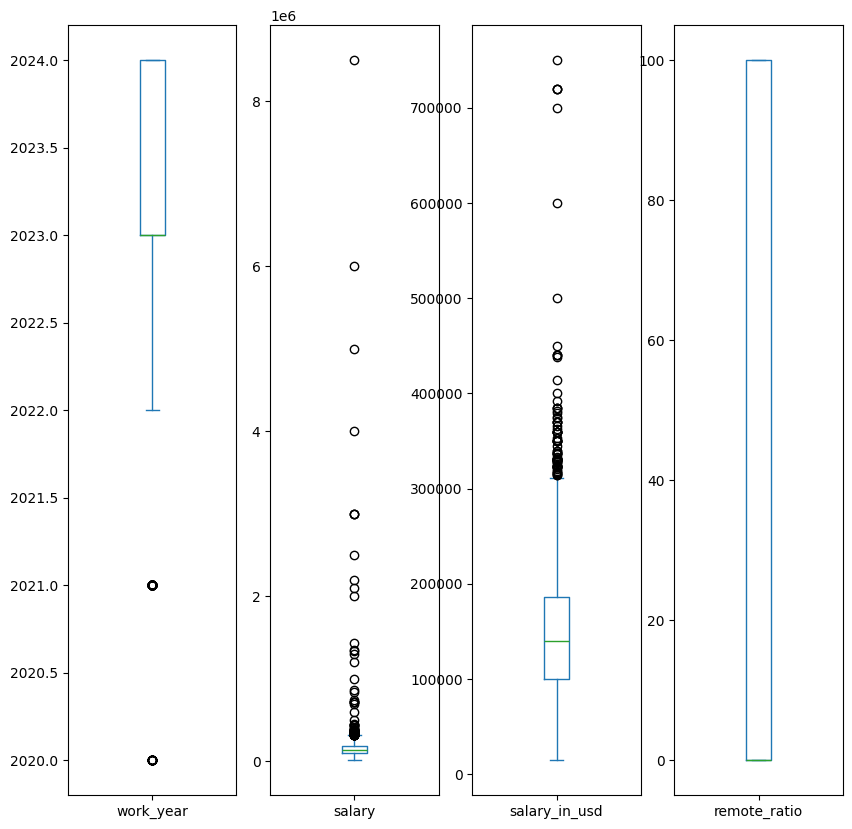

In [35]:
df.plot(kind='box', figsize=(10,10),subplots=True);

In [55]:
df[df['salary']>=250000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
26,2023,SE,FT,Analytics Engineer,275300,USD,275300,US,100,US,M
31,2021,EN,FT,Data Scientist,2100000,INR,28399,IN,100,IN,M
42,2024,EN,FT,Research Analyst,300000,USD,300000,US,0,US,M
45,2023,MI,FT,Machine Learning Engineer,300000,USD,300000,US,0,US,M
81,2023,SE,FT,Machine Learning Engineer,264400,USD,264400,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4926,2023,SE,FT,Data Scientist,297300,USD,297300,US,100,US,M
4931,2024,EX,FT,Data Science,300000,USD,300000,US,100,US,M
4949,2023,SE,FT,Machine Learning Engineer,311000,USD,311000,US,0,US,M
4958,2024,SE,FT,Machine Learning Engineer,257000,USD,257000,US,0,US,M


In [43]:
base_excel = df[df['salary']>=80000]
base_excel.to_excel('base_excel.xlsx')

In [56]:
df.salary.value_counts()

,count
salary,
100000,101
150000,101
120000,100
130000,93
160000,77
...,...
61700,1
289000,1
130400,1


<Axes: xlabel='job_title'>

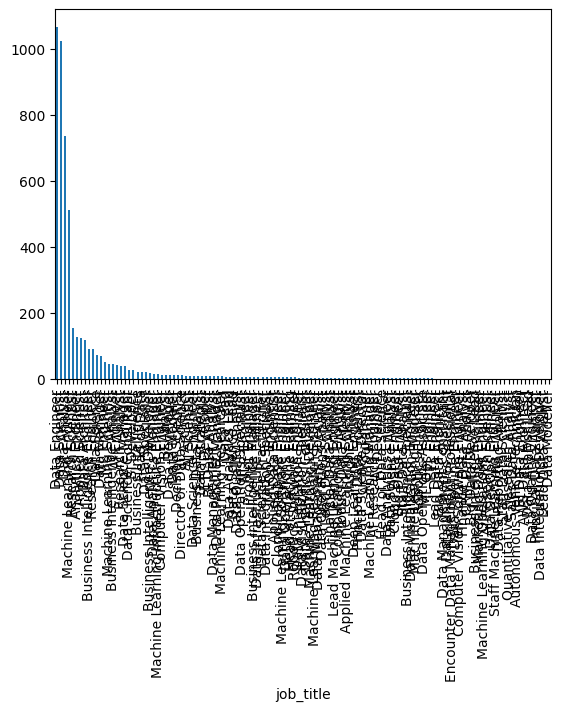

In [58]:
df.job_title.value_counts().plot(kind='bar')